In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

df = pd.read_csv('Genomics.csv')
# Fill NaN values with 0 or any suitable value before processing
df.fillna(0, inplace=True)

# Encoding the categorical variable 'variant_name' as labels
label_encoder = LabelEncoder()
df['variant_label'] = label_encoder.fit_transform(df['variant_name'])

# Features (X) and target (y)
X = df[['specimens', 'percentage', 'specimens_7d_avg', 'percentage_7d_avg']].values
y = df['variant_label'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Adjusting target names based on the unique classes in the test set
unique_labels = np.unique(y_test)
target_names = [label_encoder.inverse_transform([i])[0] for i in unique_labels]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

# Displaying the accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

       Alpha       0.65      0.22      0.33       229
        Beta       0.17      0.86      0.29       240
       Delta       0.58      0.34      0.43       216
     Epsilon       0.53      0.13      0.21       249
       Gamma       0.41      0.13      0.19       254
      Lambda       0.34      0.07      0.12       227
          Mu       0.35      0.09      0.15       232
     Omicron       0.76      0.56      0.64       232
       Other       0.69      0.83      0.75       230
       Total       1.00      1.00      1.00       228

    accuracy                           0.42      2337
   macro avg       0.55      0.42      0.41      2337
weighted avg       0.54      0.42      0.41      2337



In [3]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initializing and training the Support Vector Classifier (SVM)
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Making predictions using the SVM model
y_pred_svm = svm_classifier.predict(X_test)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm, target_names=target_names)

# Displaying the accuracy and classification report for the SVM model
print(f"Accuracy (SVM): {accuracy_svm:.2f}")
print("Classification Report (SVM):")
print(classification_rep_svm)

Accuracy (SVM): 0.21
Classification Report (SVM):
              precision    recall  f1-score   support

       Alpha       0.31      0.07      0.12       229
        Beta       0.00      0.00      0.00       240
       Delta       0.00      0.00      0.00       216
     Epsilon       0.67      0.03      0.06       249
       Gamma       0.00      0.00      0.00       254
      Lambda       0.13      1.00      0.22       227
          Mu       0.00      0.00      0.00       232
     Omicron       0.00      0.00      0.00       232
       Other       0.30      0.09      0.13       230
       Total       0.55      0.98      0.71       228

    accuracy                           0.21      2337
   macro avg       0.20      0.22      0.12      2337
weighted avg       0.20      0.21      0.12      2337



C:\Users\anike\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anike\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anike\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


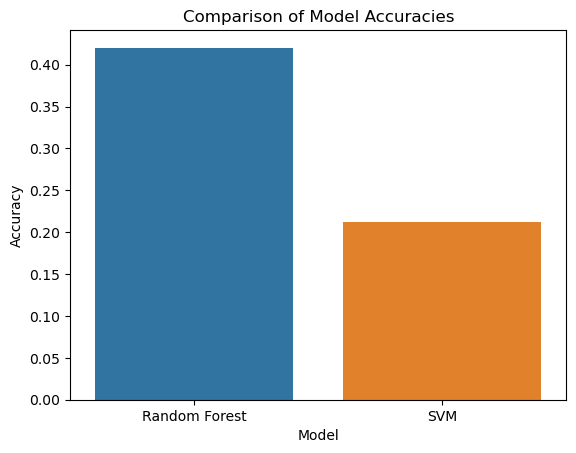

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data for accuracies
models = ['Random Forest', 'SVM']
accuracies = [accuracy, accuracy_svm]

# Creating a bar plot
sns.barplot(x=models, y=accuracies)

# Adding labels and title
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Displaying the plot
plt.show()